In [2]:
# Importing our modules, packages, and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# displays output of line on frontend
%matplotlib inline 

# Series

Two important data types defined by pandas are ``Series`` and ``DataFrames``.

You can think of a ``Series`` as a "column" of data, suich as a collection of observations on a single variable.

A DataFrame is an object for storing related columns of data.

But Series provide more than NumPy arrays. Not only do they have some additional (statistically oriented methods).

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [3]:
# Initializing a series - input a list and you can assign a name
s = pd.Series(np.random.randn(4), name="champion winrates")
s

0    0.152171
1    0.282308
2    0.188800
3    0.005695
Name: champion winrates, dtype: float64

In [4]:
# Manipulations to data
print(s * 100)
# s = s * 100
print(np.abs(s))

0    15.217127
1    28.230793
2    18.880009
3     0.569523
Name: champion winrates, dtype: float64
0    0.152171
1    0.282308
2    0.188800
3    0.005695
Name: champion winrates, dtype: float64


In [5]:
s.describe() # Describes statistical data 

count    4.000000
mean     0.157244
std      0.114934
min      0.005695
25%      0.115552
50%      0.170486
75%      0.212177
max      0.282308
Name: champion winrates, dtype: float64

In [6]:
# Renaming row values - has to be the same length
s.index = ['AMIN', 'KAYNE', 'Hello', 'YES']
s

AMIN     0.152171
KAYNE    0.282308
Hello    0.188800
YES      0.005695
Name: champion winrates, dtype: float64

In [7]:
# Finding values from index, similar to key value pairing in dictionary
s['AMIN'] = 1
print(s['AMIN'])
s

1.0


AMIN     1.000000
KAYNE    0.282308
Hello    0.188800
YES      0.005695
Name: champion winrates, dtype: float64

# DataFrames
While a ``Series`` is a single column of data, a ``DataFrame`` is a combination of columns, one for each variable.

A ``DataFrame`` in pandas is pretty similar to an Excel spreadsheet with lots of functionality.

It is a powerful tool for representing and analyzing data organized into rows and columns.

In [8]:
covid_df = pd.read_csv('./usa_county_wise.csv') # Read excel sheet to a dataFrame (JSON, tables, etc.)
type(covid_df)

pandas.core.frame.DataFrame

### Viewing Data in DataFrame

In [11]:
covid_df.head(n=1) # Looking at the dataFrame 

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/22/20,0,0


In [12]:
covid_df.describe() # Describes statistical data for all columns

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,2.374690e+05,237469.000000,237323.000000,237469.000000,237469.000000,237469.000000,237469.000000
mean,8.390300e+07,839.444205,32090.929560,37.183790,-89.174224,7.659294,0.151691
std,3.291996e+06,18.088416,17822.449027,8.621715,21.435390,279.813276,6.906155
min,1.600000e+01,16.000000,60.000000,-14.271000,-170.132000,0.000000,0.000000
25%,8.401904e+07,840.000000,19037.000000,34.237321,-98.037489,0.000000,0.000000
50%,8.403005e+07,840.000000,30045.000000,38.147359,-89.825123,0.000000,0.000000
75%,8.404701e+07,840.000000,47011.000000,41.684463,-82.793570,0.000000,0.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,57159.000000,1584.000000


### Finding columns with all rows or all rows with some columns

In [13]:
covid_df[2:5] # Choose specific rows

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",1/22/20,0,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",1/22/20,0,0


In [16]:
covid_df[['UID', 'iso2']] # Choose specific columns to look at through list

,UID,iso2
0,16,AS
1,316,GU
2,580,MP
3,630,PR
4,850,VI
...,...,...
237464,84090053,US
237465,84090054,US
237466,84090055,US
237467,84090056,US


### Finding Specific Columns and Specific Rows

In [17]:
covid_df.iloc[2:5, 0:4] # iloc uses the indices not the names

,UID,iso2,iso3,code3
2,580,MP,MNP,580
3,630,PR,PRI,630
4,850,VI,VIR,850


In [18]:
# use namings to find rows & columns
covid_df.loc[covid_df.index[2:5], ['UID', 'iso2', 'iso3', 'code3']] 

,UID,iso2,iso3,code3
2,580,MP,MNP,580
3,630,PR,PRI,630
4,850,VI,VIR,850


In [19]:
covid_df[covid_df['Lat']<18] # Find certain values satisfying a condition

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0
3149,84080001,US,USA,840,80001.0,Out of AL,Alabama,US,0.0000,0.0000,"Out of AL, Alabama, US",1/22/20,0,0
3150,84080002,US,USA,840,80002.0,Out of AK,Alaska,US,0.0000,0.0000,"Out of AK, Alaska, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237464,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,"Unassigned, Washington, US",4/3/20,501,0
237465,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,"Unassigned, West Virginia, US",4/3/20,0,0
237466,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,"Unassigned, Wisconsin, US",4/3/20,0,4
237467,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,"Unassigned, Wyoming, US",4/3/20,0,0


You can also redefine what the index if you have a unique column value

In [20]:
covid_df_copy = covid_df.set_index('code3') # Setting a value as the index
covid_df_copy.iloc[1:3]

,UID,iso2,iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
code3,,,,,,,,,,,,,
316,316,GU,GUM,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",1/22/20,0,0
580,580,MP,MNP,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0


## Manipulating Values

In [21]:
covid_df[['UID']][0:2]

,UID
0,16
1,316


In [22]:
covid_df['UID'] *= 1e3 # Changing value
covid_df[['UID']][0:2]

,UID
0,16000.0
1,316000.0


In [23]:
covid_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16000.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",1/22/20,0,0
1,316000.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",1/22/20,0,0
2,580000.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0
3,630000.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",1/22/20,0,0
4,850000.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",1/22/20,0,0


In [24]:
covid_df[1:5]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
1,316000.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",1/22/20,0,0
2,580000.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0
3,630000.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",1/22/20,0,0
4,850000.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",1/22/20,0,0


In [25]:
# Adding in new column
covid_df['code4'] = covid_df['code3'] * 1e4 
covid_df[1:5]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,code4
1,316000.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",1/22/20,0,0,3160000.0
2,580000.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0,5800000.0
3,630000.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",1/22/20,0,0,6300000.0
4,850000.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",1/22/20,0,0,8500000.0


### Sorting Data

In [26]:
covid_df = covid_df.sort_values(by='Lat', ascending=False) # Sorting values to be in a specific way
covid_df[1:10]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,code4
52138,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/7/20,0,0,8400000.0
91174,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/19/20,0,0,8400000.0
32620,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/1/20,0,0,8400000.0
188764,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",3/20/20,0,0,8400000.0
110692,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/25/20,0,0,8400000.0
185511,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",3/19/20,0,0,8400000.0
42379,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/4/20,0,0,8400000.0
104186,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/23/20,0,0,8400000.0
214788,8.400218e+10,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",3/28/20,0,0,8400000.0


### Additional Values

In [27]:
# Data is flawed sometimes - see if it is null
covid_df.isnull()[1:10] 

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,code4
52138,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
91174,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32620,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
188764,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110692,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185511,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42379,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
104186,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
214788,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# see how many null values there are
covid_df.isnull().sum() 

UID                 0
iso2                0
iso3                0
code3               0
FIPS              146
Admin2            511
Province_State      0
Country_Region      0
Lat                 0
Long_               0
Combined_Key        0
Date                0
Confirmed           0
Deaths              0
code4               0
dtype: int64

In [29]:
# Group by to see similarity based on categorical variables
covid_df.groupby(['Province_State']).mean() 

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths,code4
Province_State,,,,,,,,
Alabama,8.400350e+10,840.0,3499.869565,31.931113,-84.196785,1.931705,0.029780,8400000.0
Alaska,8.400749e+10,840.0,7494.967742,56.373544,-136.429656,0.500663,0.009722,8400000.0
American Samoa,1.600000e+04,16.0,60.000000,-14.271000,-170.132000,0.000000,0.000000,160000.0
Arizona,8.401354e+10,840.0,13542.117647,29.714033,-98.349911,9.669621,0.173247,8400000.0
Arkansas,8.400715e+10,840.0,7151.103896,34.005087,-90.033096,1.005515,0.012275,8400000.0
California,8.400869e+10,840.0,8689.600000,36.582496,-116.704308,19.256393,0.398174,8400000.0
Colorado,8.401039e+10,840.0,10393.924242,37.755612,-102.289687,5.668950,0.112910,8400000.0
Connecticut,8.402421e+10,840.0,24208.200000,33.290944,-58.125464,36.805479,0.834247,8400000.0
Delaware,8.404001e+10,840.0,40005.800000,23.465566,-45.319942,8.369863,0.183562,8400000.0


In [30]:
# Grouping by both province_state and combined_key for mean
covid_df.groupby(['Province_State', 'Combined_Key']).mean()

UID  code3     FIPS  \
Province_State Combined_Key                                            
Alabama        Autauga, Alabama, US     8.400100e+10  840.0   1001.0   
               Baldwin, Alabama, US     8.400100e+10  840.0   1003.0   
               Barbour, Alabama, US     8.400100e+10  840.0   1005.0   
               Bibb, Alabama, US        8.400101e+10  840.0   1007.0   
               Blount, Alabama, US      8.400101e+10  840.0   1009.0   
...                                              ...    ...      ...   
Wyoming        Teton, Wyoming, US       8.405604e+10  840.0  56039.0   
               Uinta, Wyoming, US       8.405604e+10  840.0  56041.0   
               Unassigned, Wyoming, US  8.409006e+10  840.0  90056.0   
               Washakie, Wyoming, US    8.405604e+10  840.0  56043.0   
               Weston, Wyoming, US      8.405604e+10  840.0  56045.0   

                                              Lat       Long_  Confirmed  \
Province_State Combined_Key                                                
Alabama        Autauga, Alabama, US     32.539527  -86.644082   0.986301   
               Baldwin, Alabama, US     30.727750  -87.722071   2.273973   
               Barbour, Alabama, US     31.868263  -85.387129   0.013699   
               Bibb, Alabama, US        32.996421  -87.125115   0.219178   
               Blount, Alabama, US      33.982109  -86.567906   0.643836   
...                                           ...         ...        ...   
Wyoming        Teton, Wyoming, US       43.935225 -110.589080   2.506849   
               Uinta, Wyoming, US       41.287818 -110.547578   0.027397   
               Unassigned, Wyoming, US   0.000000    0.000000   0.000000   
               Washakie, Wyoming, US    43.904516 -107.680187   0.123288   
               Weston, Wyoming, US      43.839612 -104.567488   0.000000   

                                          Deaths      code4  
Province_State Combined_Key                                  
Alabama        Autauga, Alabama, US     0.000000  8400000.0  
               Baldwin, Alabama, US     0.082192  8400000.0  
               Barbour, Alabama, US     0.000000  8400000.0  
               Bibb, Alabama, US        0.000000  8400000.0  
               Blount, Alabama, US      0.000000  8400000.0  
...                                          ...        ...  
Wyoming        Teton, Wyoming, US       0.000000  8400000.0  
               Uinta, Wyoming, US       0.000000  8400000.0  
               Unassigned, Wyoming, US  0.000000  8400000.0  
               Washakie, Wyoming, US    0.000000  8400000.0  
               Weston, Wyoming, US      0.000000  8400000.0  

[3253 rows x 8 columns]

In [31]:
# Combining choosing data and grouping it
covid_df[covid_df['Lat']<18].groupby(['Province_State', 'Combined_Key']).mean()  # Combining methods together

UID  code3     FIPS  \
Province_State Combined_Key                                                  
Alabama        Out of AL, Alabama, US         8.408000e+10  840.0  80001.0   
               Unassigned, Alabama, US        8.409000e+10  840.0  90001.0   
Alaska         Out of AK, Alaska, US          8.408000e+10  840.0  80002.0   
               Unassigned, Alaska, US         8.409000e+10  840.0  90002.0   
American Samoa American Samoa, US             1.600000e+04   16.0     60.0   
...                                                    ...    ...      ...   
West Virginia  Unassigned, West Virginia, US  8.409005e+10  840.0  90054.0   
Wisconsin      Out of WI, Wisconsin, US       8.408006e+10  840.0  80055.0   
               Unassigned, Wisconsin, US      8.409006e+10  840.0  90055.0   
Wyoming        Out of WY, Wyoming, US         8.408006e+10  840.0  80056.0   
               Unassigned, Wyoming, US        8.409006e+10  840.0  90056.0   

                                                 Lat    Long_  Confirmed  \
Province_State Combined_Key                                                
Alabama        Out of AL, Alabama, US          0.000    0.000   0.000000   
               Unassigned, Alabama, US         0.000    0.000   0.054795   
Alaska         Out of AK, Alaska, US           0.000    0.000   0.000000   
               Unassigned, Alaska, US          0.000    0.000   0.013699   
American Samoa American Samoa, US            -14.271 -170.132   0.000000   
...                                              ...      ...        ...   
West Virginia  Unassigned, West Virginia, US   0.000    0.000   0.000000   
Wisconsin      Out of WI, Wisconsin, US        0.000    0.000   0.000000   
               Unassigned, Wisconsin, US       0.000    0.000   0.835616   
Wyoming        Out of WY, Wyoming, US          0.000    0.000   0.000000   
               Unassigned, Wyoming, US         0.000    0.000   0.000000   

                                                Deaths      code4  
Province_State Combined_Key                                        
Alabama        Out of AL, Alabama, US         0.000000  8400000.0  
               Unassigned, Alabama, US        0.178082  8400000.0  
Alaska         Out of AK, Alaska, US          0.000000  8400000.0  
               Unassigned, Alaska, US         0.205479  8400000.0  
American Samoa American Samoa, US             0.000000   160000.0  
...                                                ...        ...  
West Virginia  Unassigned, West Virginia, US  0.013699  8400000.0  
Wisconsin      Out of WI, Wisconsin, US       0.000000  8400000.0  
               Unassigned, Wisconsin, US      0.123288  8400000.0  
Wyoming        Out of WY, Wyoming, US         0.000000  8400000.0  
               Unassigned, Wyoming, US        0.000000  8400000.0  

[107 rows x 8 columns]

### Graphing

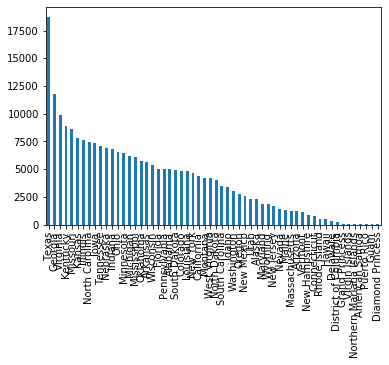

In [32]:
# counts of certain and build graph of it
pd.value_counts(covid_df['Province_State']).plot.bar() 